In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import warnings
warnings.filterwarnings('ignore')

In [6]:
from sklearn.preprocessing import LabelEncoder

df = pd.read_csv(r"..\Cases\Glass Identification\Glass.csv")
le = LabelEncoder()
y = le.fit_transform(df['Type'])
X = df.drop('Type', axis=1)
df.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,building_windows_float_processed
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,building_windows_float_processed
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,building_windows_float_processed
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,building_windows_float_processed
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,building_windows_float_processed


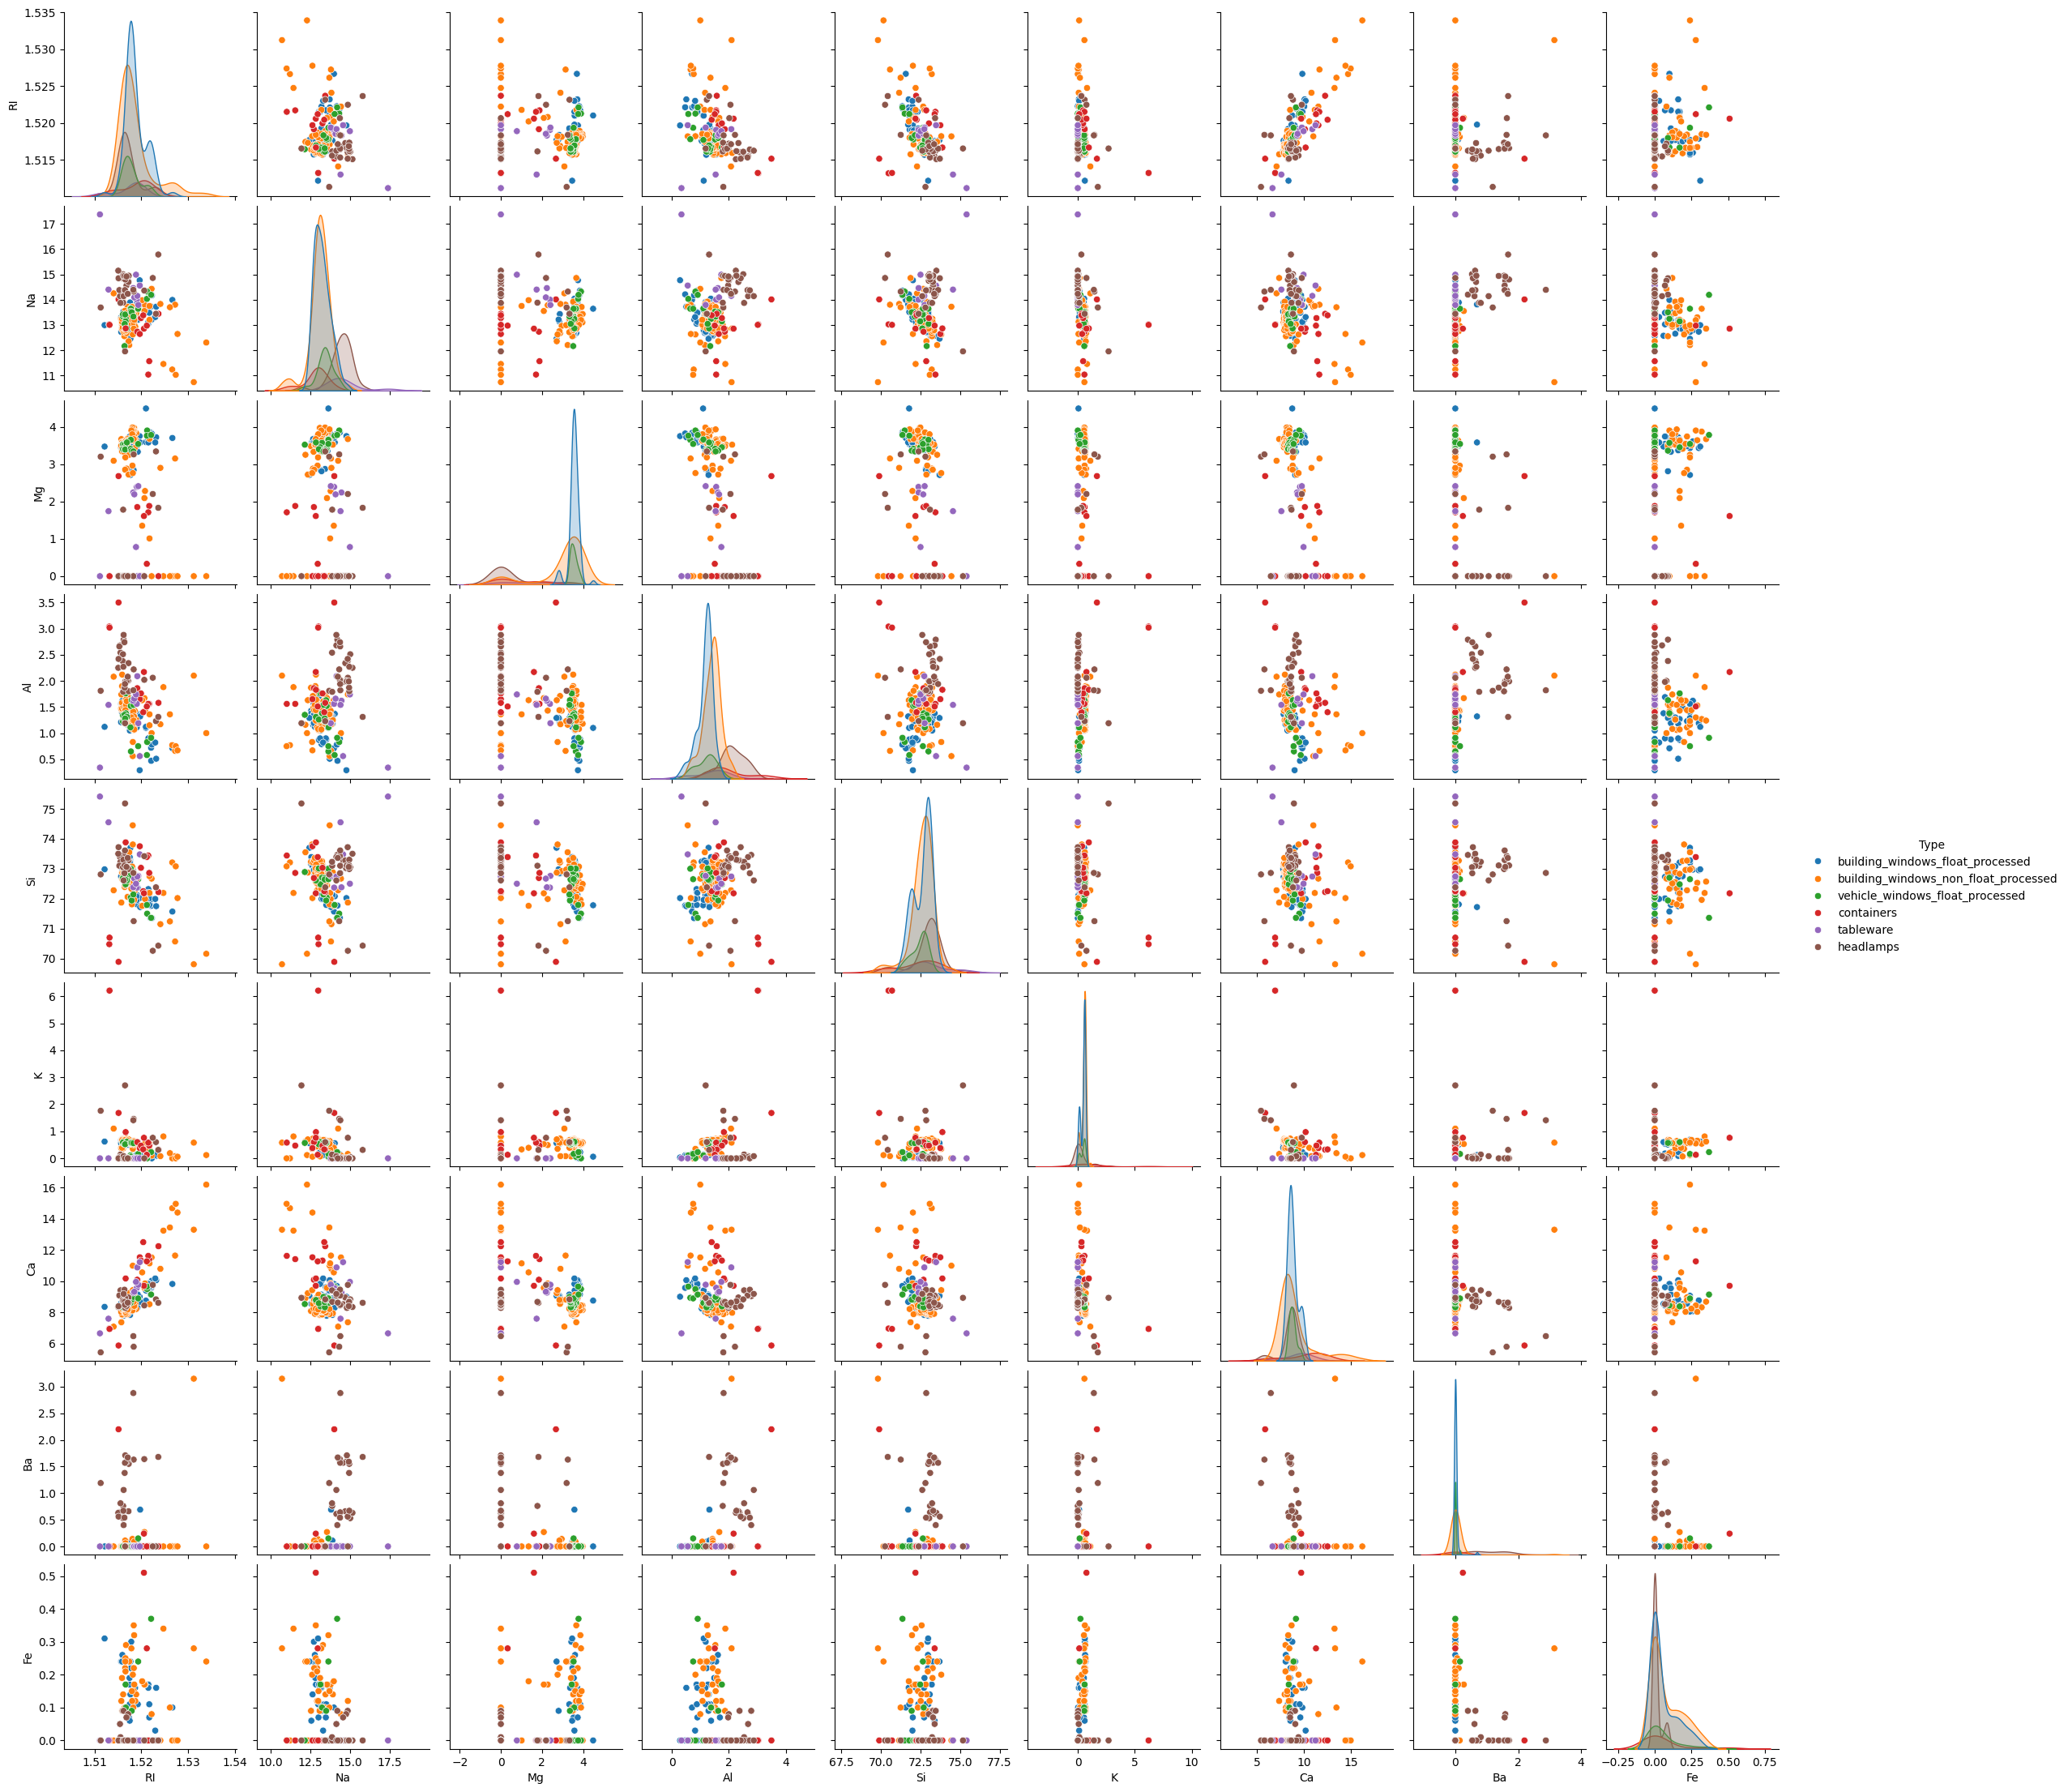

In [7]:
sns.pairplot(data=df, hue='Type')
plt.show()

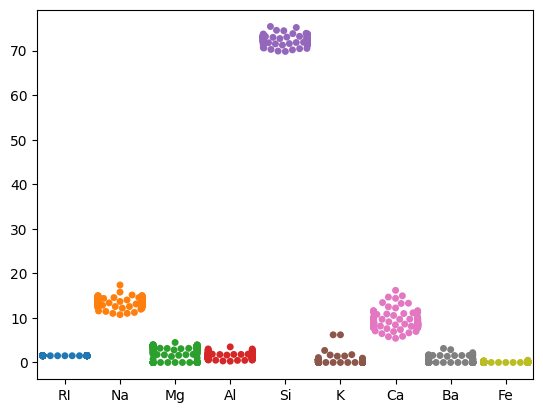

In [8]:
sns.swarmplot(data=df)
plt.show()

In [28]:
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.pipeline import Pipeline


kfold = StratifiedKFold(shuffle=True, random_state=24, n_splits=5)

dtc = DecisionTreeClassifier(random_state=24)
dtc.fit(X, y)

# pipe = Pipeline([('DTC', dtc)])

# print(pipe.get_params())

params = {'max_depth': np.arange(2,11), 
          'min_samples_split': range(2,21),
          'min_samples_leaf': range(2,16)}

gcv = GridSearchCV(dtc, param_grid=params, cv=kfold, scoring='neg_log_loss')

gcv.fit(X, y)

print(gcv.best_params_)
print(gcv.best_score_)

{'max_depth': 3, 'min_samples_leaf': 7, 'min_samples_split': 2}
-1.8450088600844896


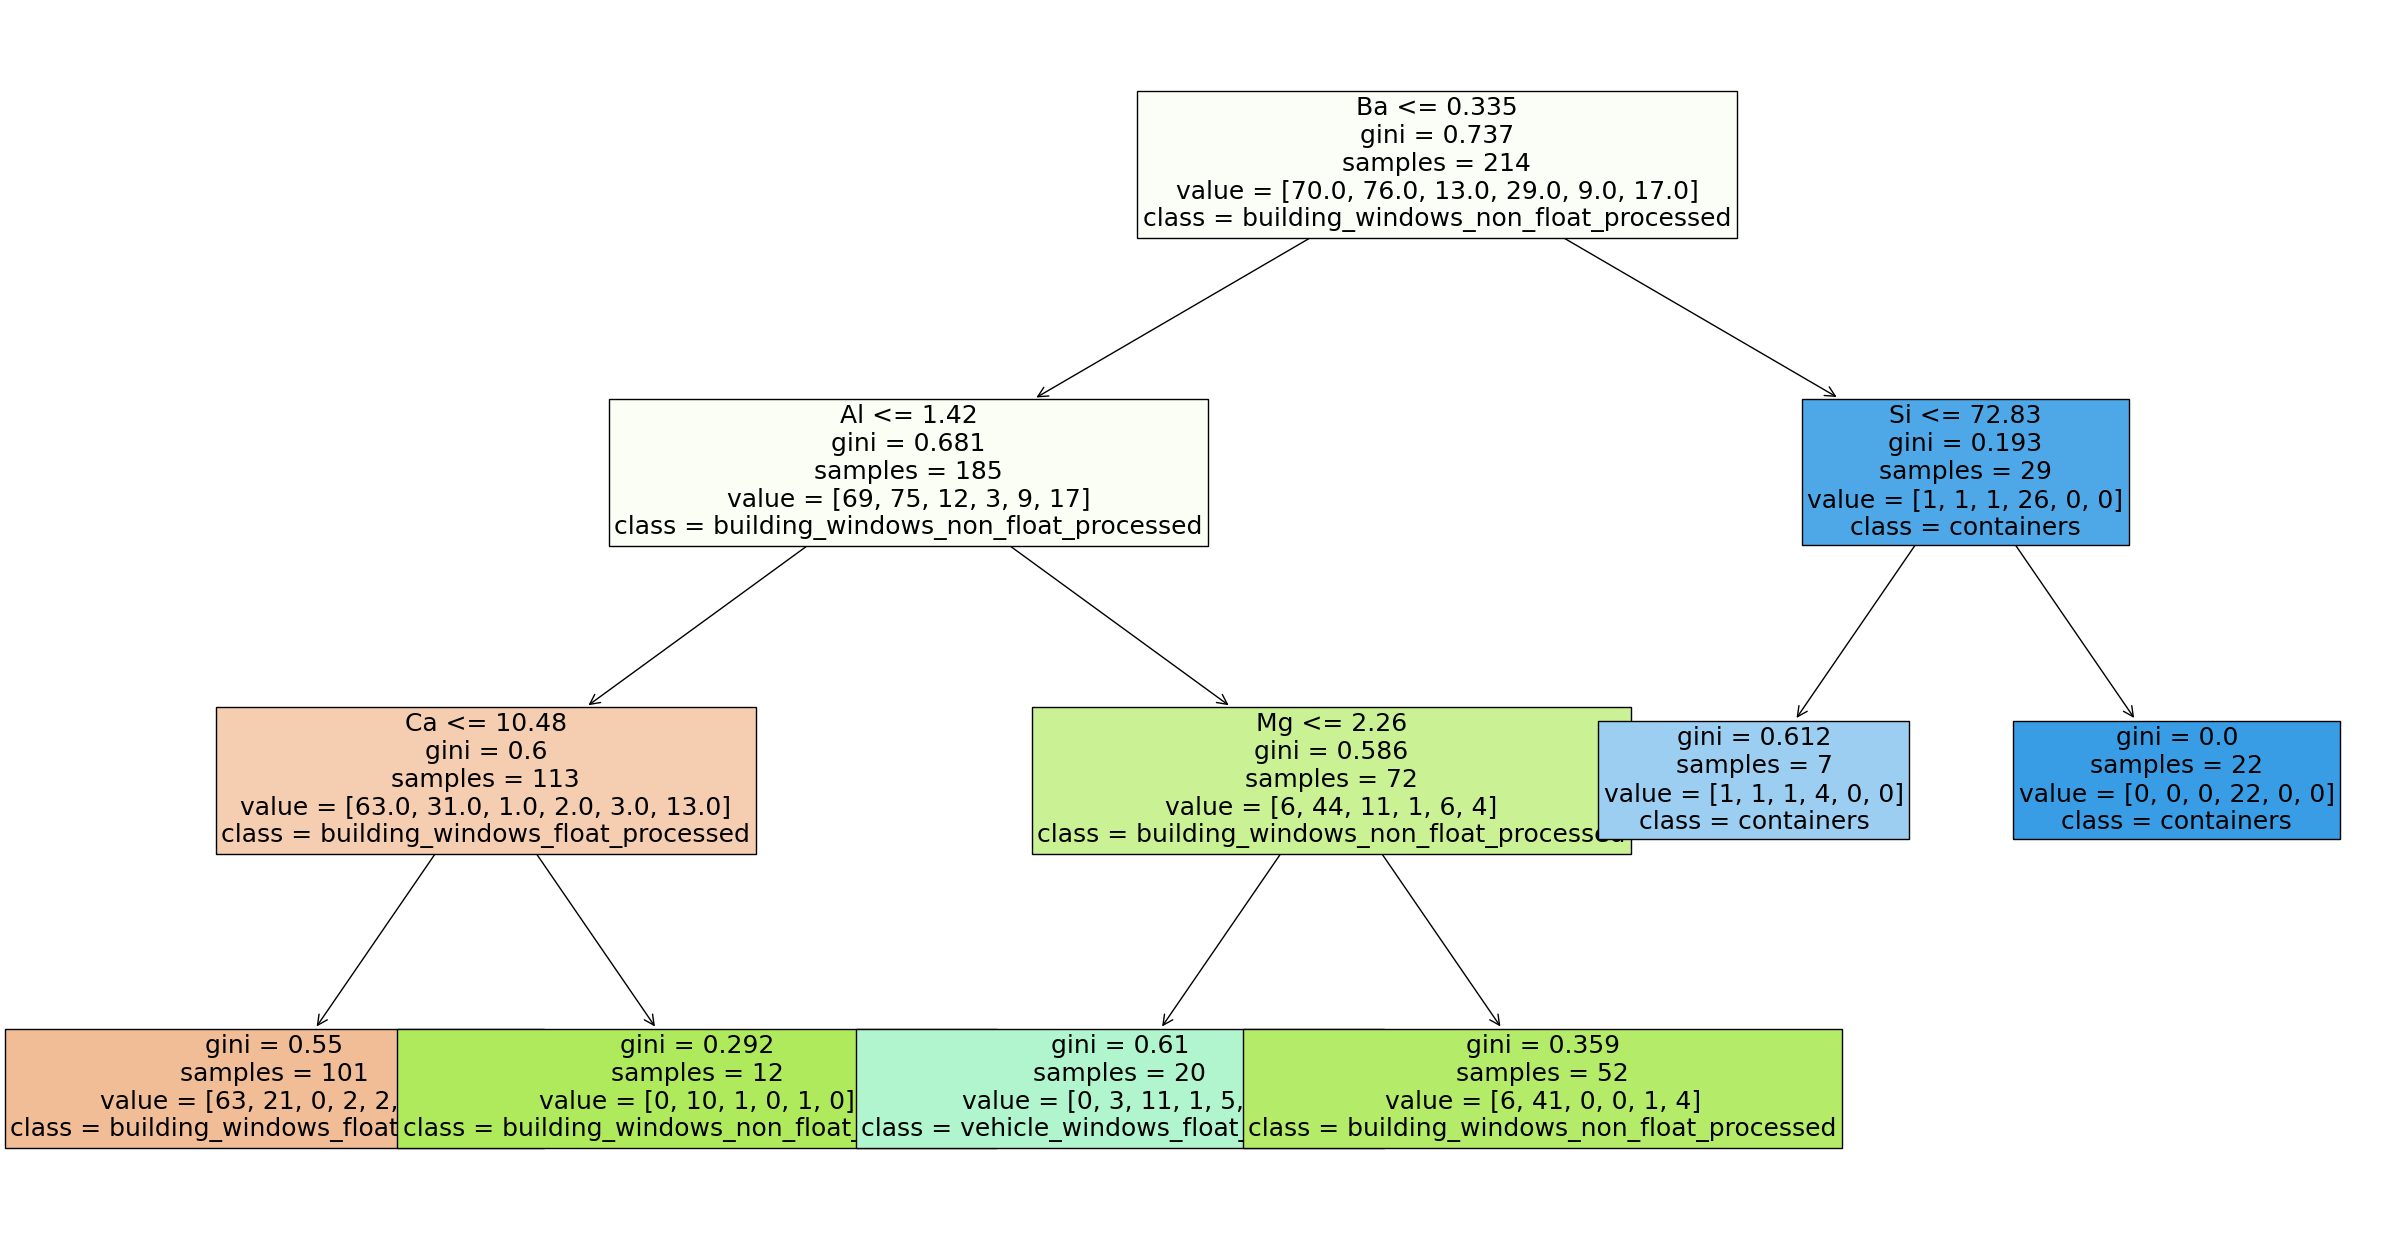

In [29]:
best_tree = gcv.best_estimator_

plt.figure(figsize=(30,16))
plot_tree(best_tree,feature_names=list(X.columns),
               class_names=df['Type'].unique(),
               filled=True,fontsize=18
               )
plt.show() 

In [30]:
print(best_tree.feature_importances_)

[0.         0.         0.17876148 0.25355955 0.02049962 0.
 0.13663425 0.41054509 0.        ]


In [34]:
df_imp = pd.DataFrame({'Features': list(X.columns), 'Fea_Imp':list(best_tree.feature_importances_)})
df_imp

,Features,Fea_Imp
0,RI,0.000000
1,Na,0.000000
2,Mg,0.178761
3,Al,0.253560
4,Si,0.020500
5,K,0.000000
6,Ca,0.136634
7,Ba,0.410545
8,Fe,0.000000


<Axes: xlabel='Features', ylabel='Fea_Imp'>

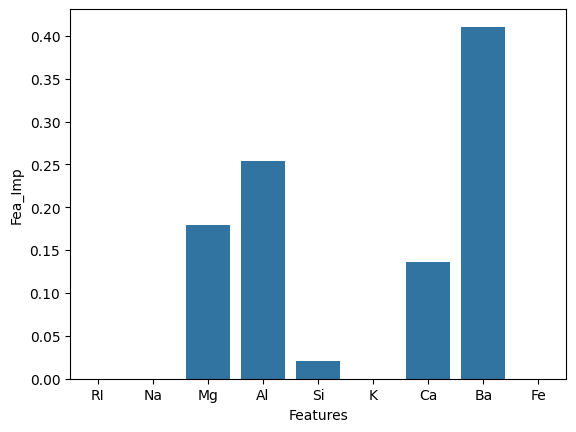

In [40]:
sns.barplot(data=df_imp, x="Features", y="Fea_Imp")